# Cargar Datos

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('data\mushrooms.csv')

# Exploratorio

## Estadisticas 

In [21]:
# Información del DataFrame
print(df.info())
# Descripción estadística del DataFrame
print(df.describe())
# Conteo de valores únicos en cada columna
print(df.nunique())
# Tipos de datos de cada columna
print(df.dtypes)
# Dimensiones del DataFrame
print(df.shape)
# Nombres de las columnas
print(df.columns)
# Índices del DataFrame
print(df.index)
# Valores del DataFrame
print(df.values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Graficas 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

## Distribución de la clase

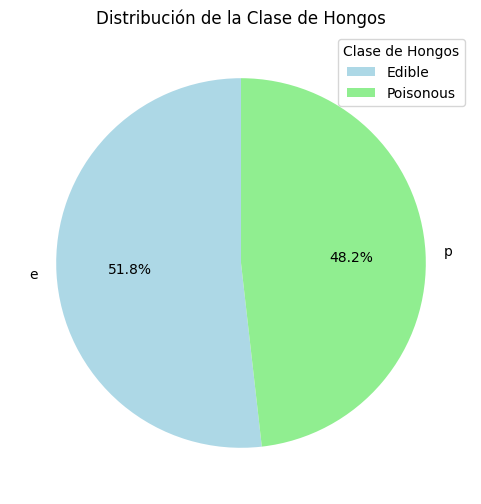

In [23]:
# Diagrama de PIE para la columna 'class'
plt.figure(figsize=(6, 6))
df['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])

# Cambiar etiqueta de 'e' a 'Edible' y 'p' a 'Poisonous'
labels = ['Edible' if label == 'e' else 'Poisonous' for label in df['class'].value_counts().index]
plt.legend(labels, title='Clase de Hongos', loc='upper right')

plt.title('Distribución de la Clase de Hongos')
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()

## Matriz de Correlación

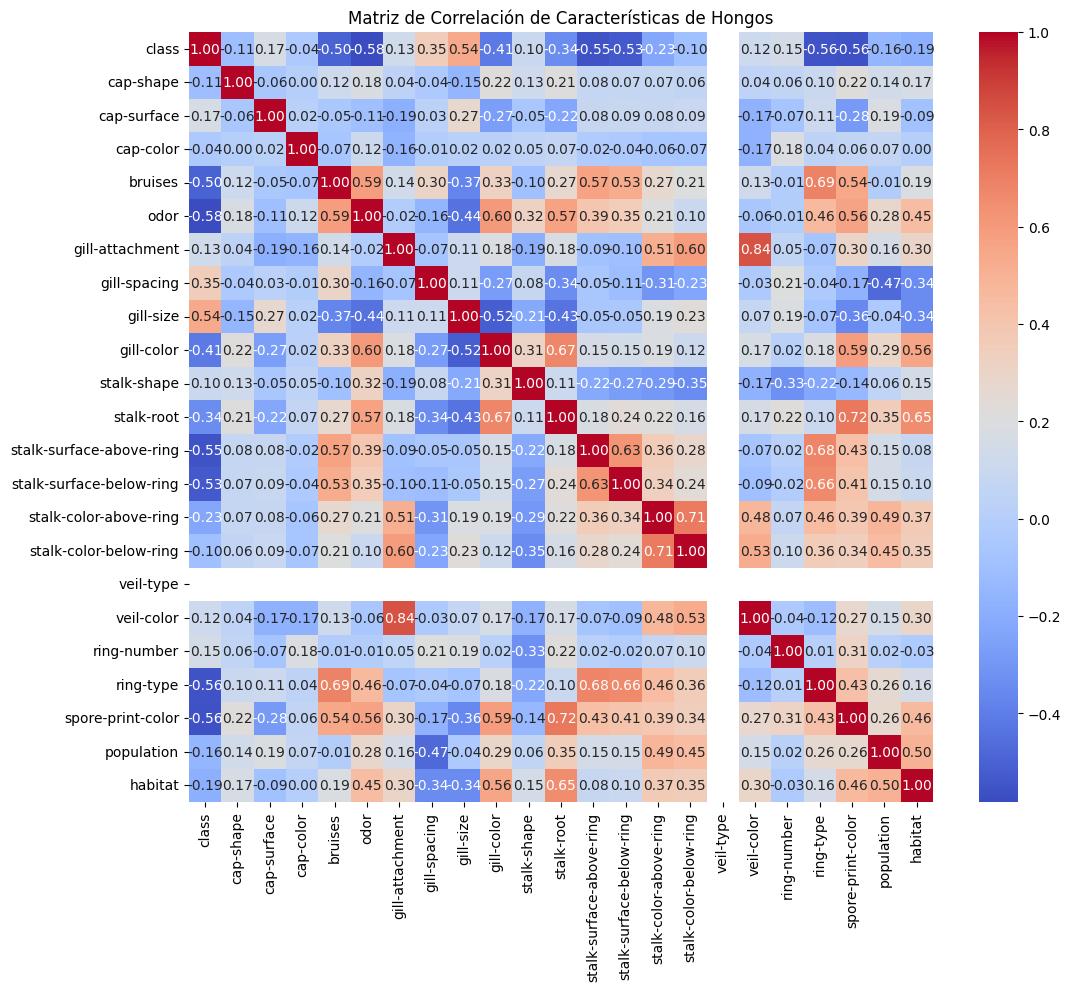

In [24]:
# Diagrama de correlación
plt.figure(figsize=(12, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación de Características de Hongos')
plt.show()

## Preparación de Datos

In [25]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# Encodificación de variables categóricas

le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Partición de Datos

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Separación de los datos en características (X) y etiqueta (y)

X = df.drop('class', axis=1)
y = df['class']


# Partición de los datos en entrenamiento (70%), validación (15%) y prueba (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Segundo: Validation (15%) + Test (15%) = dividir X_temp en 0.5 y 0.5
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)


# Entrenamiento con Modelo Random Forest

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [49]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
y_val_pred = rf.predict(X_val)

In [51]:
print("\n====================================")
print("     MÉTRICAS EN VALIDATION SET")
print("====================================")
print("Accuracy (val):", accuracy_score(y_val, y_val_pred))
print("\nMatriz de Confusión (val):\n", confusion_matrix(y_val, y_val_pred))
print("\nReporte de Clasificación (val):\n", classification_report(y_val, y_val_pred))

# ----------------------------
# 7. EVALUAR EN TEST FINAL
# ----------------------------
y_test_pred = rf.predict(X_test)

print("\n====================================")
print("     MÉTRICAS EN TEST SET FINAL")
print("====================================")
print("Accuracy (test):", accuracy_score(y_test, y_test_pred))
print("\nMatriz de Confusión (test):\n", confusion_matrix(y_test, y_test_pred))
print("\nReporte de Clasificación (test):\n", classification_report(y_test, y_test_pred))


     MÉTRICAS EN VALIDATION SET
Accuracy (val): 1.0

Matriz de Confusión (val):
 [[631   0]
 [  0 588]]

Reporte de Clasificación (val):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219


     MÉTRICAS EN TEST SET FINAL
Accuracy (test): 1.0

Matriz de Confusión (test):
 [[632   0]
 [  0 587]]

Reporte de Clasificación (test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       587

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



# Entrenamiento con Modelo Red Neuronal

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [53]:
categorical_cols = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # Arquitectura de la red
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("scaler", StandardScaler(with_mean=False)),  # necesario para MLP
    ("model", mlp)
])

In [54]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [55]:
y_val_pred = pipeline.predict(X_val)

In [56]:
print("\n====================================")
print("     MÉTRICAS EN VALIDATION SET")
print("====================================")
print("Accuracy (val):", accuracy_score(y_val, y_val_pred))
print("\nMatriz de Confusión (val):\n", confusion_matrix(y_val, y_val_pred))
print("\nReporte de Clasificación (val):\n", classification_report(y_val, y_val_pred))

# ----------------------------
# 7. EVALUAR EN TEST FINAL
# ----------------------------
y_test_pred = pipeline.predict(X_test)

print("\n====================================")
print("     MÉTRICAS EN TEST SET FINAL")
print("====================================")
print("Accuracy (test):", accuracy_score(y_test, y_test_pred))
print("\nMatriz de Confusión (test):\n", confusion_matrix(y_test, y_test_pred))
print("\nReporte de Clasificación (test):\n", classification_report(y_test, y_test_pred))


     MÉTRICAS EN VALIDATION SET
Accuracy (val): 1.0

Matriz de Confusión (val):
 [[631   0]
 [  0 588]]

Reporte de Clasificación (val):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219


     MÉTRICAS EN TEST SET FINAL
Accuracy (test): 1.0

Matriz de Confusión (test):
 [[632   0]
 [  0 587]]

Reporte de Clasificación (test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       587

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219

